# Volume Dataset Analysis

In this exercise you will be analyzing a DICOM dataset. This dataset is not as conveniently organized on the filesystem as some of the datasets we have seen in the lesson just now. Rather, this dataset looks like somethign that you are likely to get as a raw dump from a clinical data archive.  

Your task is to use the skills you have acquired in this lesson to go through this dataset and answer (or provide your best quess to) the following questions:
1. What imaging modality was used to produce this dataset?
1. Data from how many patients does the dataset include?
1. How many studies are in the dataset?
1. What is the oldest and most recent study in the dataset?
1. How many series are in the dataset?

In addition, do the following tasks:

1. List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD
1. The dataset contains two outliers. Can you find them? Type up why do you think these volumes are outliers.

In [1]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.ma as ma
import numpy as np
import os
import pandas as pd

In [2]:
from collections import Counter

In [3]:
# getting all the series data

<TYPE YOUR ANSWERS HERE>

In [4]:
path = r"data"
data = np.array([[(os.path.join(dp, f), pydicom.dcmread(os.path.join(dp, f), stop_before_pixels = True)) for f in files]
                   for dp,_,files in os.walk(path) if len(files) != 0])

In [5]:
data[0][0][1]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.229098847496270476126665028704
(0008, 0020) Study Date                          DA: '19940112'
(0008, 0021) Series Date                         DA: '19940112'
(0008, 0023) Content Date                        DA: '19940112'
(0008, 0030) Study Time                          TM: '085518'
(0008, 0031) Series Time                         TM: '090803'
(0008, 0033) Content Time                        TM: '090803'
(0008, 0050) Accession Number                    SH: '4468773825686010'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'Imaging Biometrics LLC'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1030) Study

# Checking how many total instances are present altogeher

In [6]:
instances = [f for l in data for f in l]
len(instances)

864

# No. of patients in the data

In [7]:
patient_ids = np.unique([inst[1].PatientID for inst in instances])
print(patient_ids)
print(len(patient_ids))

['123456' 'OPA135179' 'PGBM-003' 'PGBM-004' 'PGBM-005' 'PGBM-009']
6


In [8]:
# We can rely on the patient id tag

# Studies

In [9]:
study_ids = np.unique([inst[1].StudyInstanceUID for inst in instances])
print(study_ids)
print("The number of studies present in the data:", len(study_ids))

['1.2.752.24.7.1550985044.2753616'
 '1.2.826.0.1.3680043.2.1125.1.9839520250291993940949520616565396'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.142872696423641709332868254917'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.173425268180092806279003900097'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.192304828189026101657054875952'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.205075845250444634584024148845'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.231796058972489013039499925050'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.729192279796218307950472057198'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.812059520220877654137991744184'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.873522078320106668263470477052']
The number of studies present in the data: 10


# Series

In [10]:
series_ids = np.unique([inst[1].SeriesInstanceUID for inst in instances])
print(series_ids)
print("The number of series present in the data:", len(series_ids))

['1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286'
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094690934070899838243'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371716382165219422799'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.131971402732874033229609248302'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.137802635701410656176169562528'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.148342356080268980546237840587'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.158869091666854803918782490935'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.165843183220097757648432257390'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.167613564536106399232524912048'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.201921745402287812448748810010'
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.211130119213590294

# Number of instances per patient

In [11]:
pd.Series([inst[1].PatientID for inst in instances]).value_counts()

PGBM-003     184
PGBM-005     184
PGBM-004     180
PGBM-009     141
123456       139
OPA135179     36
dtype: int64

# Number of Studies per patient

In [12]:
df = pd.DataFrame([(inst[1].PatientID, inst[1].StudyInstanceUID) for inst in instances],
                  columns = ["Patient_ID", "Study_ID"])
df.head()

,Patient_ID,Study_ID
0,PGBM-004,1.3.6.1.4.1.14519.5.2.1.4429.7055.873522078320...
1,PGBM-005,1.3.6.1.4.1.14519.5.2.1.4429.7055.192304828189...
2,PGBM-003,1.3.6.1.4.1.14519.5.2.1.4429.7055.729192279796...
3,PGBM-003,1.3.6.1.4.1.14519.5.2.1.4429.7055.812059520220...
4,PGBM-003,1.3.6.1.4.1.14519.5.2.1.4429.7055.729192279796...


In [13]:
df.groupby(["Patient_ID"])["Study_ID"].nunique()

Patient_ID
123456       1
OPA135179    1
PGBM-003     2
PGBM-004     2
PGBM-005     2
PGBM-009     2
Name: Study_ID, dtype: int64

# What imaging modality was used to produce this dataset?

In [14]:
Counter([inst[1].Modality for inst in instances])

Counter({'MR': 725, 'CT': 139})

# What is the oldest and most recent study in the dataset?

In [15]:
study_dates = np.unique([int(inst[1].StudyDate) for inst in instances])
np.sort(study_dates)

array([19880512, 19910103, 19910702, 19920505, 19930622, 19940112,
       19950329, 19951017, 20150116, 20190101])

# List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD

In [16]:
df = pd.DataFrame([(inst[1].SeriesInstanceUID, inst[1].Rows, inst[1].Columns, inst[1].Modality)  for inst in instances], 
                  columns = ["Series_ID", "Rows", "Columns", "Modality"])

df.shape

(864, 4)

In [17]:
final_df = pd.DataFrame(df.groupby(["Series_ID","Rows", "Columns", "Modality"]).size().reset_index())

In [18]:
final_df.columns = ['Series_ID', 'Rows', 'Columns', 'Modality', 'num_slices']

In [19]:
final_df.head()

,Series_ID,Rows,Columns,Modality,num_slices
0,1.2.826.0.1.3680043.2.1125.1.45859137663006505...,512,512,CT,139
1,1.3.12.2.1107.5.2.33.37105.2015011616025092819...,448,448,MR,36
2,1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202...,320,280,MR,22
3,1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094...,320,280,MR,22
4,1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371...,512,512,MR,22


# Lets visualize one ct image and one mr image

In [20]:
ct_series = final_df["Series_ID"][0]
ct_series

'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286'

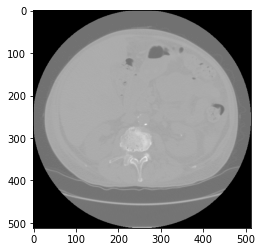

In [21]:
for i in instances:
    if i[1].SeriesInstanceUID == ct_series:
        im = [pydicom.dcmread(i[0])]
        plt.imshow(im[0].pixel_array, cmap = 'gray')
        plt.show()
        break

In [22]:
# Another approach
slices_ct = [pydicom.dcmread(i[0]) for i in instances if i[1].SeriesInstanceUID == ct_series]

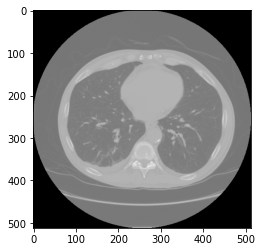

In [23]:
plt.imshow(slices_ct[65].pixel_array, cmap = 'gray')

In [24]:
mr_series = final_df["Series_ID"][2]
mr_series

'1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706'

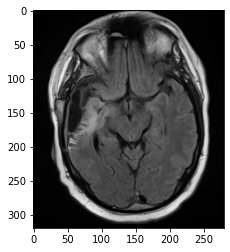

In [25]:
slices_mr = [pydicom.dcmread(i[0]) for i in instances if i[1].SeriesInstanceUID == mr_series]
plt.imshow(slices_mr[10].pixel_array, cmap = 'gray')